In [ ]:
# How we got the Data 
This Code reads in all the links to all the Regulons on RegulonDB

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import requests 
import json

In [ ]:
# Daten einlesen von Webscrape Regulon Links

In [6]:
with open("regulon_links.json", "r") as file: 
    regulon_links = json.load(file)

In [7]:
regulon_links

{'DicF': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC00328',
 'DsrA': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC00358',
 'GcvB': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC03275',
 'McaS': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC03411',
 'GadY': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC03413',
 'MicF': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC03508',
 'OxyS': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC03909',
 'ChiX': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC04122',
 'SgrS': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC04132',
 'IstR-1': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC04134',
 'RseX': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC04142',
 'RydC': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC04143',
 'OhsC': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC04144',
 'SymR': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC04148',
 'MgrR': 'https://regulondb.ccg.unam.mx/regulon/RDBECOLIPDC0

In [28]:
# request body we reversed engineered from regulon db graphql back end
body= """
query GetRegulonBy($advancedSearch: String, $search: String) {
  getRegulonBy(advancedSearch: $advancedSearch, search: $search) {
    data {
      _id
      aligmentMatrix {
        aligment
        consensus
        matrix
        urlMatrixQualityResult
        urlPWMLogo
        __typename
      }
      allCitations {
        evidence {
          _id
          additiveEvidenceCodeRule
          code
          name
          type
          __typename
        }
        publication {
          _id
          authors
          citation
          pmid
          title
          url
          year
          __typename
        }
        __typename
      }
      evolutionaryConservation {
        urlPromoterTargetGene
        urlRegulatorTargetGene
        __typename
      }
      organism {
        _id
        name
        __typename
      }
      regulates {
        genes {
          _id
          function
          name
          terms {
            geneOntology {
              biologicalProcess {
                _id
                name
                __typename
              }
              cellularComponent {
                _id
                name
                __typename
              }
              molecularFunction {
                _id
                name
                __typename
              }
              __typename
            }
            multifun {
              _id
              genes {
                _id
                name
                __typename
              }
              name
              __typename
            }
            __typename
          }
          __typename
        }
        operons {
          _id
          firstGene {
            _id
            name
            __typename
          }
          function
          name
          __typename
        }
        sigmaFactors {
          _id
          function
          gene {
            _id
            name
            __typename
          }
          name
          __typename
        }
        transcriptionFactors {
          _id
          function
          name
          __typename
        }
        transcriptionUnits {
          _id
          function
          name
          promoter {
            _id
            name
            __typename
          }
          firstGene {
            _id
            name
            __typename
          }
          __typename
        }
        __typename
      }
      regulator {
        _id
        abbreviatedName
        additiveEvidences {
          category
          code
          type
          __typename
        }
        citations {
          evidence {
            _id
            additiveEvidenceCodeRule
            code
            name
            type
            __typename
          }
          publication {
            _id
            authors
            citation
            pmid
            title
            url
            year
            __typename
          }
          __typename
        }
        confidenceLevel
        conformations {
          _id
          class
          confidenceLevel
          effector {
            _id
            name
            __typename
          }
          effectorInteractionType
          functionalType
          name
          note
          type
          __typename
        }
        connectivityClass
        encodedBy {
          genes {
            _id
            leftEndPosition
            length
            name
            rightEndPosition
            __typename
          }
          operon {
            _id
            name
            tusEncodingRegulator {
              promoterName
              transcriptionUnitName
              __typename
            }
            __typename
          }
          __typename
        }
        family
        function
        name
        note
        products {
          _id
          abbreviatedName
          name
          __typename
        }
        sensingClass
        siteLength
        symmetry
        synonyms
        type
        __typename
      }
      regulatoryInteractions {
        _id
        activeConformation {
          _id
          name
          type
          __typename
        }
        additiveEvidences {
          category
          code
          type
          __typename
        }
        citations {
          evidence {
            _id
            additiveEvidenceCodeRule
            code
            name
            type
            __typename
          }
          publication {
            _id
            authors
            citation
            pmid
            title
            url
            year
            __typename
          }
          __typename
        }
        confidenceLevel
        distanceToFirstGene
        distanceToPromoter
        function
        regulatedEntity {
          _id
          name
          type
          __typename
        }
        regulatedGenes {
          _id
          name
          __typename
        }
        regulatoryBindingSites {
          absolutePosition
          function
          leftEndPosition
          rightEndPosition
          sequence
          strand
          __typename
        }
        __typename
      }
      summary {
        bindingSites {
          activated
          dual
          repressed
          total
          unknown
          __typename
        }
        genes {
          activated
          dual
          repressed
          total
          unknown
          __typename
        }
        operons {
          activated
          dual
          repressed
          total
          unknown
          __typename
        }
        regulatoryInteractions {
          activated
          dual
          repressed
          total
          unknown
          __typename
        }
        sigmaFactors {
          activated
          dual
          repressed
          total
          unknown
          __typename
        }
        transcriptionFactors {
          activated
          dual
          repressed
          total
          unknown
          __typename
        }
        transcriptionUnits {
          activated
          dual
          repressed
          total
          unknown
          __typename
        }
        __typename
      }
      terms {
        geneOntology {
          biologicalProcess {
            _id
            name
            __typename
          }
          cellularComponent {
            _id
            name
            __typename
          }
          molecularFunction {
            _id
            name
            __typename
          }
          __typename
        }
        multifun {
          _id
          genes {
            _id
            name
            __typename
          }
          name
          __typename
        }
        __typename
      }
      __typename
    }
    __typename
  }
}"""
request1 = {"operationName" : "GetRegulonBy", "query": body, "variables": {"advancedSearch": ""}}

In [ ]:
# AUCH ADDEN HIER DAS WIR DIE DESCRIPTION ETC EINFÜGEN

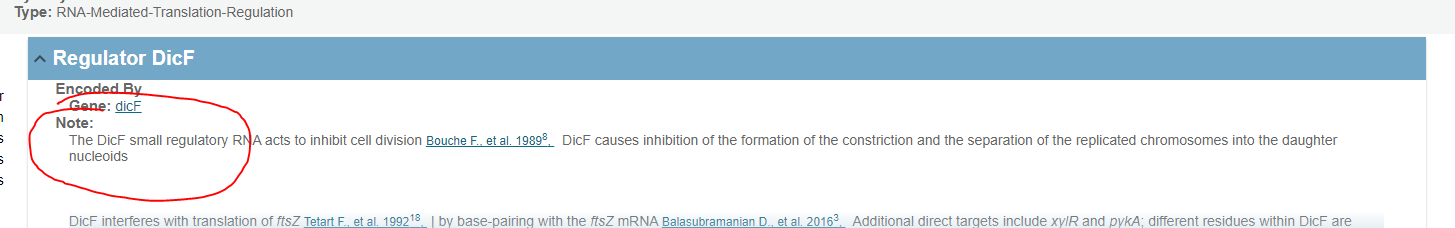

In [39]:
def get_triplet(subjekt, _id):
    triplets = []
    url = "https://regulondb.ccg.unam.mx/graphql"
    request1["variables"]["advancedSearch"] = _id + "[_id]"
    response = json.loads(requests.post(url = url, json = request1, verify = False).content)
    for _object in response["data"]["getRegulonBy"]["data"][0]["regulates"]["genes"]:
        triplets.append({"subjekt" : subjekt, "predikat" : _object["function"], "objekt" : _object["name"]})
    #print(triplets)
    return triplets

test = get_triplet("DicF", "RDBECOLIPDC00328")
test

C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'ftsZ'},
 {'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'xylR'},
 {'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'pykA'},
 {'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'manX'}]

In [34]:
# here we loop through all the links... get the Name of the Regulon and the ID and collect the triplets

In [35]:
for key, value in regulon_links.items():
    print(key)
    print(value.split("/")[-1])
    get_triplet(key, value.split("/")[-1])

DicF
RDBECOLIPDC00328


C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'ftsZ'}, {'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'xylR'}, {'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'pykA'}, {'subjekt': 'DicF', 'predikat': 'repressor', 'objekt': 'manX'}]
DsrA
RDBECOLIPDC00358


C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'hns'}, {'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'lrp'}, {'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'rbsK'}, {'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'rbsB'}, {'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'rbsD'}, {'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'rbsC'}, {'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'rbsR'}, {'subjekt': 'DsrA', 'predikat': 'repressor', 'objekt': 'rbsA'}, {'subjekt': 'DsrA', 'predikat': 'activator', 'objekt': 'rpoS'}]
GcvB
RDBECOLIPDC03275


C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'cycA'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'lrp'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'csgF'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'csgD'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'csgE'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'csgG'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'phoP'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'phoQ'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'asnB'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'ysgA'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'tcyJ'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'asnA'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'panD'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'nlpA'}, {'subjekt': 'GcvB', 'predikat': 'repressor', 'objekt': 'inaA'}, {'subjekt': 'GcvB', 'predikat': 'repress

C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'McaS', 'predikat': 'repressor', 'objekt': 'csgF'}, {'subjekt': 'McaS', 'predikat': 'repressor', 'objekt': 'csgD'}, {'subjekt': 'McaS', 'predikat': 'repressor', 'objekt': 'csgE'}, {'subjekt': 'McaS', 'predikat': 'repressor', 'objekt': 'csgG'}, {'subjekt': 'McaS', 'predikat': 'activator', 'objekt': 'flhD'}, {'subjekt': 'McaS', 'predikat': 'activator', 'objekt': 'flhC'}]
GadY
RDBECOLIPDC03413


C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'GadY', 'predikat': 'activator', 'objekt': 'gadW'}, {'subjekt': 'GadY', 'predikat': 'activator', 'objekt': 'gadX'}]
MicF
RDBECOLIPDC03508


C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'MicF', 'predikat': 'repressor', 'objekt': 'ompF'}, {'subjekt': 'MicF', 'predikat': 'repressor', 'objekt': 'lrp'}, {'subjekt': 'MicF', 'predikat': 'repressor', 'objekt': 'cpxR'}, {'subjekt': 'MicF', 'predikat': 'repressor', 'objekt': 'cpxA'}, {'subjekt': 'MicF', 'predikat': 'repressor', 'objekt': 'phoE'}, {'subjekt': 'MicF', 'predikat': 'activator', 'objekt': 'oppA'}, {'subjekt': 'MicF', 'predikat': 'repressor', 'objekt': 'tcyJ'}]
OxyS
RDBECOLIPDC03909


C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'subjekt': 'OxyS', 'predikat': 'repressor', 'objekt': 'rpoS'}, {'subjekt': 'OxyS', 'predikat': 'repressor', 'objekt': 'fhlA'}, {'subjekt': 'OxyS', 'predikat': 'repressor', 'objekt': 'flhD'}, {'subjekt': 'OxyS', 'predikat': 'repressor', 'objekt': 'flhC'}, {'subjekt': 'OxyS', 'predikat': 'repressor', 'objekt': 'nusG'}]
ChiX
RDBECOLIPDC04122


C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(

KeyboardInterrupt



# TEST ENVIRONMENT

In [36]:
url = "https://regulondb.ccg.unam.mx/graphql"

In [37]:
request1["variables"]["advancedSearch"] = "RDBECOLIPDC00328[_id]" # DicF
response = json.loads(requests.post(url = url, json = request1, verify = False).content)

C:\Users\peter\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'regulondb.ccg.unam.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [38]:
response

{'data': {'getRegulonBy': {'data': [{'_id': 'RDBECOLIPDC00328',
     'aligmentMatrix': {'aligment': None,
      'consensus': None,
      'matrix': None,
      'urlMatrixQualityResult': None,
      'urlPWMLogo': None,
      '__typename': 'AligmentMatrix'},
     'allCitations': [{'evidence': {'_id': 'RDBECOLIEVC00062',
        'additiveEvidenceCodeRule': None,
        'code': 'EXP-IGI',
        'name': 'Inferred from genetic interaction',
        'type': 'W',
        '__typename': 'Evidence'},
       'publication': {'_id': 'RDBECOLIPRC06277',
        'authors': ['Tetart F',
         'Albigot R',
         'Conter A',
         'Mulder E',
         'Bouche JP'],
        'citation': 'Tetart F, Albigot R, Conter A, Mulder E, Bouche JP, 1992, Involvement of FtsZ in coupling of nucleoid separation with septation.',
        'pmid': '1552861',
        'title': 'Involvement of FtsZ in coupling of nucleoid separation with septation.',
        'url': 'https://www.ncbi.nlm.nih.gov/pubmed/1552861',
  

In [38]:
response["data"]["getRegulonBy"]["data"][0].keys()

dict_keys(['_id', 'aligmentMatrix', 'allCitations', 'evolutionaryConservation', 'organism', 'regulates', 'regulator', 'regulatoryInteractions', 'summary', 'terms', '__typename'])

In [39]:
response["data"]["getRegulonBy"]["data"][0]["regulates"].keys()

dict_keys(['genes', 'operons', 'sigmaFactors', 'transcriptionFactors', 'transcriptionUnits', '__typename'])

In [40]:
response["data"]["getRegulonBy"]["data"][0]["regulator"].keys()

dict_keys(['_id', 'abbreviatedName', 'additiveEvidences', 'citations', 'confidenceLevel', 'conformations', 'connectivityClass', 'encodedBy', 'family', 'function', 'name', 'note', 'products', 'sensingClass', 'siteLength', 'symmetry', 'synonyms', 'type', '__typename'])

In [47]:
response["data"]["getRegulonBy"]["data"][0]["regulates"]["genes"][0]["function"]

'repressor'

In [41]:
response["data"]["getRegulonBy"]["data"][0]["regulates"]["genes"][0].keys()

dict_keys(['_id', 'function', 'name', 'terms', '__typename'])

In [42]:
response["data"]["getRegulonBy"]["data"][0]["regulates"]["genes"][0]["name"]

'ftsZ'

In [43]:
len(response["data"]["getRegulonBy"]["data"][0]["regulates"]["genes"])

4

In [44]:
response["data"]["getRegulonBy"]["data"][0]["regulates"]["genes"][0]

{'_id': 'RDBECOLIGNC00341',
 'function': 'repressor',
 'name': 'ftsZ',
 'terms': {'geneOntology': {'biologicalProcess': [{'_id': 'RDBONTOLGON05376',
     'name': 'GO:0000917 - division septum assembly',
     '__typename': 'RegulonGeneOntologyItem'},
    {'_id': 'RDBONTOLGON01742',
     'name': 'GO:0007049 - cell cycle',
     '__typename': 'RegulonGeneOntologyItem'},
    {'_id': 'RDBONTOLGON06640',
     'name': 'GO:0043093 - FtsZ-dependent cytokinesis',
     '__typename': 'RegulonGeneOntologyItem'},
    {'_id': 'RDBONTOLGON05750',
     'name': 'GO:0051258 - protein polymerization',
     '__typename': 'RegulonGeneOntologyItem'},
    {'_id': 'RDBONTOLGON01741',
     'name': 'GO:0051301 - cell division',
     '__typename': 'RegulonGeneOntologyItem'},
    {'_id': 'RDBONTOLGON00995',
     'name': 'GO:0090529 - cell septum assembly',
     '__typename': 'RegulonGeneOntologyItem'}],
   'cellularComponent': [{'_id': 'RDBONTOLGON02071',
     'name': 'GO:0005737 - cytoplasm',
     '__typename': 'R